## Домашнее задание по летней практике № 3

Ахметзянов Д.Р.
М8О-202Б-21

![](3photo.png)

![](31photo.png)

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as sc
import pandas as pd

In [2]:
def f(x):
    return x ** 4 - 3 * x ** 3 - 21 * x ** 2 + 43 * x + 60

In [3]:
def dihotomia(f, a, b, tol) -> float: # метод дихотомии поиска корня функции
    x = 0
    while abs(b - a) > tol:
        x = (a + b) / 2 # середина отрезка
        function_x = f(x) 
        function_a = f(a)
        # если середина отрезка и левая граница выше оси 'x', смещаем 'а' в середину отрезка
        # если середина отрезка ниже и левая граница ниже оси 'x', смещаем 'a' в середину отрезка
        # иначе смещаем правую границу в середину отрезка
        if function_x < 0 and function_a < 0 or function_x > 0 and function_a > 0: 
            a = x
        else:
            b = x
    return a

In [4]:
def our_root(f, x0=None, step=None, tol=None) -> float:
    if x0 is None:
        x0 = np.random.uniform(-100, 100) 
        print(f'{x0=}')
    if step is None:
        step = np.random.uniform(0.01, 0.1) 
        print(f'{step=}')
    if tol is None:
        tol = np.random.uniform(0.001, 0.01) 
        print(f'{tol=}')
    a = x0
    b = a + step
    while True:
        a += step
        b += step
        function_a = f(a)
        function_b = f(b)
        if function_a > 0: # изначально над осью Х
            if function_a < function_b:  # движение в сторону возрастания, меняем направление
                step = -step
                b += 2 * step
            elif 0 <= function_b < function_a:  # движение в сторону оси Х
                continue
            elif function_b < function_a and function_b < 0:  # правая граница снизу от оси Х
                return dihotomia(f, a, b, tol)
        elif function_a < 0: # изначально под осью Х
            if function_a > function_b: # движение в сторону убывания, меняем направление
                step = -step
            elif function_a < function_b < 0: # движение в сторону оси Х
                continue
            elif function_b > function_a and function_b > 0: # правая граница сверху от оси Х
                return dihotomia(f, a, b, tol)
        else:
            return a

In [5]:
def our_min(f, x0=None, step=None, tol=None) -> float:
    if x0 is None:
        x0 = np.random.uniform(-100, 100) 
        print(f'{x0=}')
    if step is None:
        step = np.random.uniform(0.01, 0.1) 
        print(f'{step=}')
    if tol is None:
        tol = np.random.uniform(0.001, 0.01) 
        print(f'{tol=}')
    a = x0
    b = a + step
    while True: 
        a += step
        b += step
        function_a = f(a)
        function_b = f(b)
        if function_b < function_a: # движение в сторну убывания
            continue
        elif function_b > function_a: # движение в сторону возрастания
            b -= 2 * step # возвращаемся на 2 точки назад
            step /= -2 # уменьшаем шаг и меняем напрвление
        if abs(a - b) < tol:
            return a

In [6]:
def our_max(f, x0=None, step=None, tol=None) -> float:
    if x0 is None:
        x0 = np.random.uniform(-100, 100) 
        print(f'{x0=}')
    if step is None:
        step = np.random.uniform(0.01, 0.1) 
        print(f'{step=}')
    if tol is None:
        tol = np.random.uniform(0.001, 0.01) 
        print(f'{tol=}')
    a = x0
    b = a + step
    while True: 
        a += step
        b += step
        function_a = f(a)
        function_b = f(b)
        if function_b > function_a: # движение в сторону возрастания
            continue
        elif function_b < function_a:# движение в сторону уменьшения, меняем направление
            b -= 2 * step # возвращаемся на 2 точки назад
            step /= -2 # уменьшаем шаг и меняем напрвление
        if abs(a - b) < tol:
            return a

In [7]:
our_root(f)

x0=-75.56990330533269
step=0.025796540195969025
tol=0.001584854486321547


-4.000627099139967

In [8]:
our_min(f, 0, 0.06, 0.01)

-2.8199999999999963

In [9]:
our_max(f, -2, 0.00005, 0.001)

0.9170500000019154

In [10]:
x = sp.Symbol('x')
function = sp.simplify('x ** 4 - 3 * x ** 3 - 21 * x ** 2 + 43 * x + 60')
function_draw = sp.lambdify(x, function)
function_dx = sp.diff(function, x) # производная функции
function_dxx = sp.diff(function_dx, x) # 2 производная функции
print(f'{function=}', f'{function_dx=}', f'{function_dxx=}', sep = '\n')

function=x**4 - 3*x**3 - 21*x**2 + 43*x + 60
function_dx=4*x**3 - 9*x**2 - 42*x + 43
function_dxx=12*x**2 - 18*x - 42


Нахождение точек корней функции

In [11]:
equation_root = sp.Eq(function, rhs=0) # создание уравнения
solution_root = sp.solve(equation_root, x) # решение уравнения
print(f'{equation_root=}', f'{solution_root=}', sep = '\n')

equation_root=Eq(x**4 - 3*x**3 - 21*x**2 + 43*x + 60, 0)
solution_root=[-4, -1, 3, 5]


Нахождение точек экстремума

In [12]:
equation_extreme = sp.Eq(function_dx, rhs=0) # создение уравнения
solution_extreme = sp.solve(equation_extreme, x, cubics = False) # находение экстремумов
print(f'{equation_extreme=}', f'{solution_extreme=}', sep = '\n')

equation_extreme=Eq(4*x**3 - 9*x**2 - 42*x + 43, 0)
solution_extreme=[CRootOf(4*x**3 - 9*x**2 - 42*x + 43, 0), CRootOf(4*x**3 - 9*x**2 - 42*x + 43, 1), CRootOf(4*x**3 - 9*x**2 - 42*x + 43, 2)]


Определение знаков точек экстремума

In [13]:
dots_max = [sp.simplify(i) for i in solution_extreme if round(function_dxx.evalf(subs={x:i})) < 0]
dots_min = [sp.simplify(i) for i in solution_extreme if round(function_dxx.evalf(subs={x:i})) > 0]

In [14]:
print(f'Max = {dots_max}')
print(f'Min = {dots_min}')

Max = [CRootOf(4*x**3 - 9*x**2 - 42*x + 43, 1)]
Min = [CRootOf(4*x**3 - 9*x**2 - 42*x + 43, 0), CRootOf(4*x**3 - 9*x**2 - 42*x + 43, 2)]


In [15]:
function_draw = sp.lambdify(x, function) # перевод функции из sympy в python
function_dx_draw = sp.lambdify(x, function_dx)

In [16]:
delta_x_root = np.linspace(-5, 6, 100) # делим ось икс по
delta_f_root = [function_draw(i) for i in delta_x_root] # подставляем значения в функцию

delta_x_extreme = np.linspace(-5, 6, 100) # делим ось икс по
delta_f_extreme = [function_dx_draw(i) for i in delta_x_root] # подставляем значения в функцию

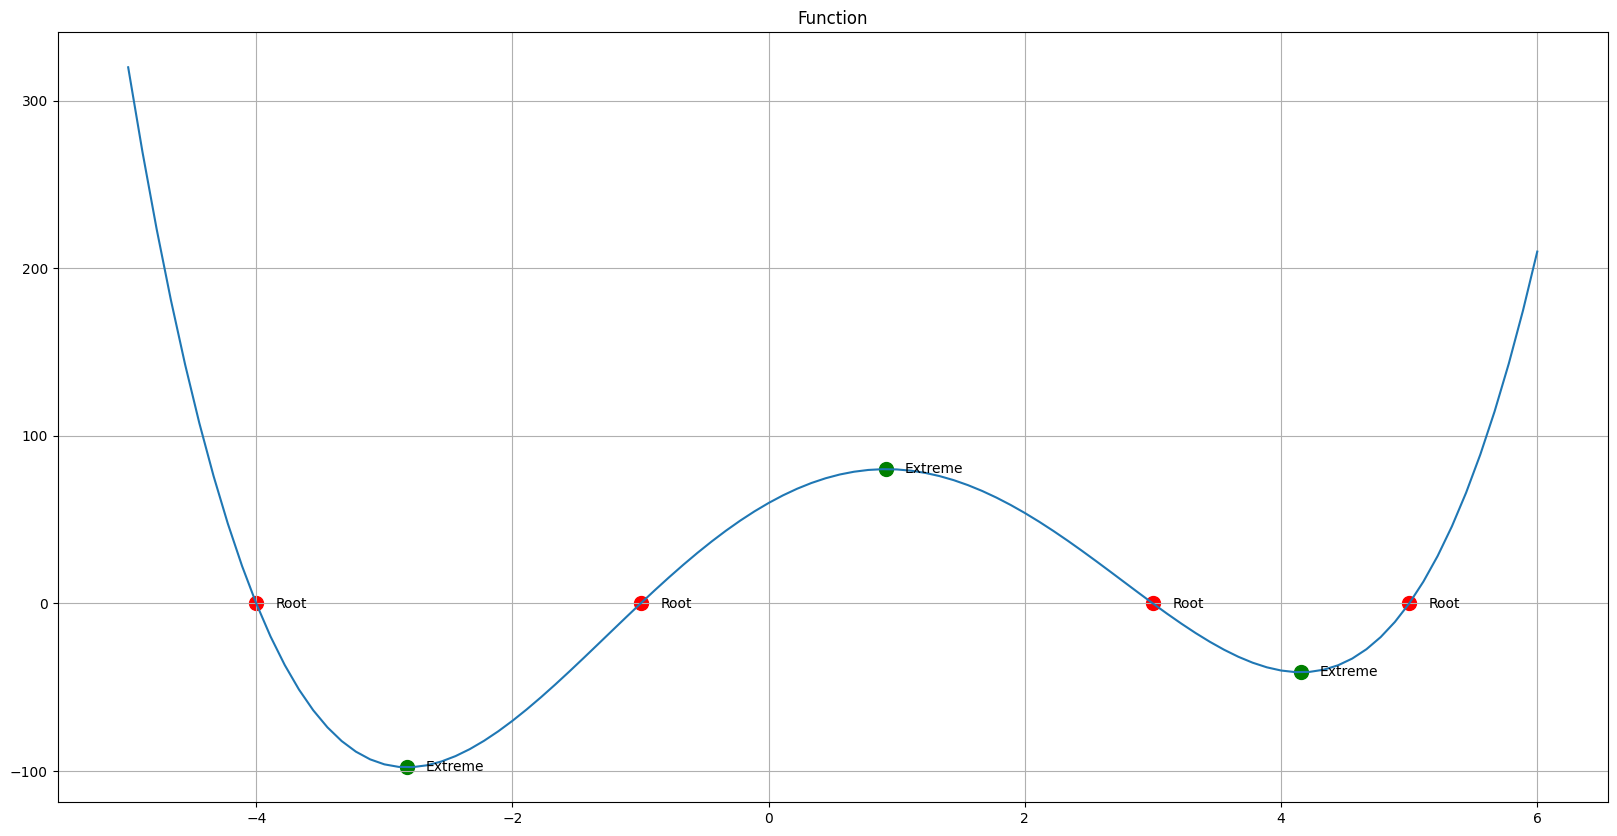

In [17]:
plt.figure(figsize = (20, 10))
plt.plot(delta_x_root, delta_f_root)
plt.title('Function')
for i in range(len(solution_root)):
    min_max = solution_root[i]
    plt.scatter(min_max, function_draw(min_max), s = 100, color = 'red')
    plt.text(min_max+ 0.4, function_draw(min_max), 'Root', ha='right', va='center')
for i in range(len(solution_extreme)):
    min_max = solution_extreme[i]
    plt.scatter(min_max, function_draw(min_max), s = 100, color = 'green')
    plt.text(min_max+ 0.6, function_draw(min_max), 'Extreme', ha='right', va='center')
plt.grid(True)
plt.show()

[-4.]
[-1.]
[3.]
[5.]


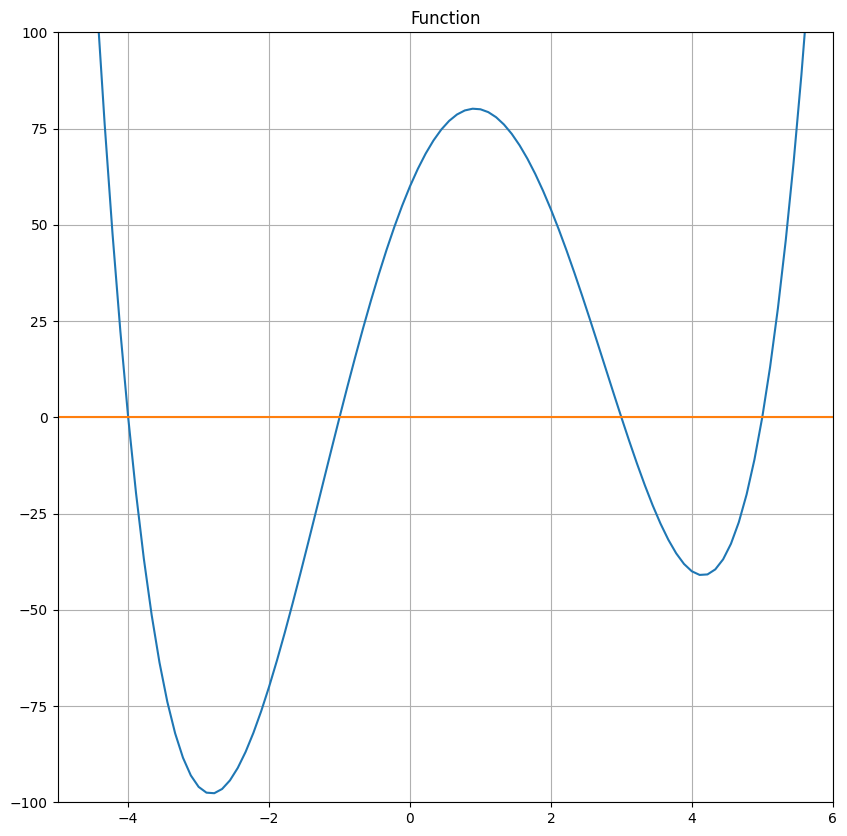

In [18]:
plt.figure(figsize = (10, 10))
plt.xlim([-5, 6])
plt.ylim([-100, 100])
plt.plot(delta_x_root, delta_f_root)
plt.title('Function')
plt.grid()
plt.plot([delta_x_root[0],delta_x_root[-1]],[0,0])

print(sc.root(function_draw, -4).x) # численное решение уравнения. Зависит от начальной точки.
print(sc.root(function_draw, -1).x)
print(sc.root(function_draw, 3).x)
print(sc.root(function_draw, 5).x)

[-2.82158578]
[0.91704916]
[4.15453662]


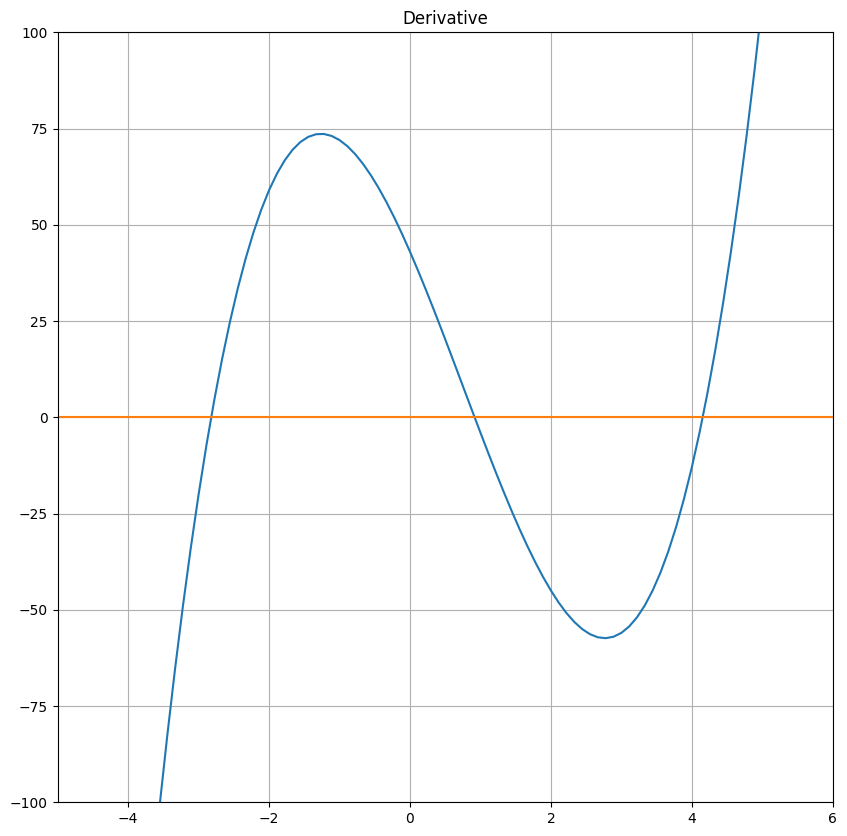

In [19]:
plt.figure(figsize = (10, 10))
plt.xlim([-5, 6])
plt.ylim([-100, 100])
plt.plot(delta_x_extreme, delta_f_extreme)
plt.title('Derivative')
plt.grid()
plt.plot([delta_x_extreme[0],delta_x_extreme[-1]],[0,0])
print(sc.root(function_dx_draw, -2.82).x) # численное решение уравнения. Зависит от начальной точки.
print(sc.root(function_dx_draw, 0.92).x)
print(sc.root(function_dx_draw, 4.15).x)

![](32photo.png)

![](33photo.png)

In [20]:
def f2(x, y):
    return x ** 2 + 2 * x * y + 6 * y ** 2 + 2 * x + 7 * y + 9

In [21]:
def our_TwoVarsMinimum(f2, x0=None, step=None, tol=None) -> tuple[float, float]: #метод покоординатного спуска 2мерной функции
    if x0 is None:
        x0 = [np.random.uniform(-100, 100), np.random.uniform(-100, 100)] 
        print(f'{x0=}')
    if step is None:
        step = np.random.uniform(0.01, 0.1) 
        print(f'{step=}')
    if tol is None:
        tol = np.random.uniform(0.001, 0.01) 
        print(f'{tol=}')
    x, y = x0
    i = 1
    while True: 
        '''
        Запускаем итергационный алгоритм поиска, подставляем в полученный локальный минимум другой переменной шагом ранее. 
        В our_min подставляем начальное положение как предыдущий лок мин по той же координате.
        '''
        function_x = lambda x: f2(x, y) 
        x = our_min(function_x, x, step, tol)
        
        function_y = lambda y: f2(x, y)
        y = our_min(function_y, y, step, tol)
        
        print(f'{i}) {x=}, {y=}')
        if np.sqrt((x - x0[0]) ** 2 + (y - x0[1]) ** 2) < tol and abs(f2(x, y) - f2(x0[0], x0[1])) < tol:
            return x, y
        x0 = x, y
        i += 1
    

In [22]:
our_TwoVarsMinimum(f2, [100,100], 0.007, 0.001)

1) x=-100.99800000009105, y=16.25199999995614
2) x=-17.253500000071174, y=2.2939999999548286
3) x=-3.2990000000714628, y=-0.03000000004516706
4) x=-0.971500000071456, y=-0.41850000004516735
5) x=-0.5830000000714556, y=-0.4850000000451674
6) x=-0.5165000000714555, y=-0.4955000000451674
7) x=-0.5060000000714554, y=-0.4955000000451674
8) x=-0.5025000000714553, y=-0.4990000000451674
9) x=-0.49900000007145534, y=-0.4990000000451674
10) x=-0.49900000007145534, y=-0.4990000000451674


(-0.49900000007145534, -0.4990000000451674)

In [23]:
x, y = sp.symbols('x y')
function = sp.simplify('x ** 2 + 2 * x * y + 6 * y ** 2 + 2 * x + 7 * y + 9')
function_dx = sp.diff(function, x)
function_dy = sp.diff(function, y)
function_diff = function_dx / function_dy
print(f'{function=}', f'{function_dx=}', f'{function_dy=}', f'{function_diff=}', sep = '\n')

function=x**2 + 2*x*y + 2*x + 6*y**2 + 7*y + 9
function_dx=2*x + 2*y + 2
function_dy=2*x + 12*y + 7
function_diff=(2*x + 2*y + 2)/(2*x + 12*y + 7)


In [24]:
equation = sp.Eq(function_diff, rhs=0)
solution = sp.solve([equation], [x, y])
print(f'{equation=}', f'{solution=}', sep = '\n')

equation=Eq((2*x + 2*y + 2)/(2*x + 12*y + 7), 0)
solution={x: -y - 1}


In [25]:
delta_x = np.linspace(-100, 100, 100) # делим по абциссе
delta_y = np.linspace(-100, 100, 100) # делим по ординате

In [26]:
X, Y = np.meshgrid(delta_x, delta_y)
Z = f2(X,Y)

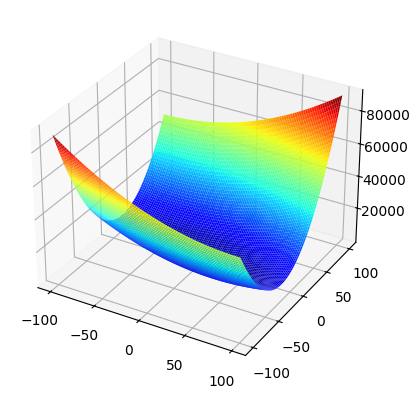

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')

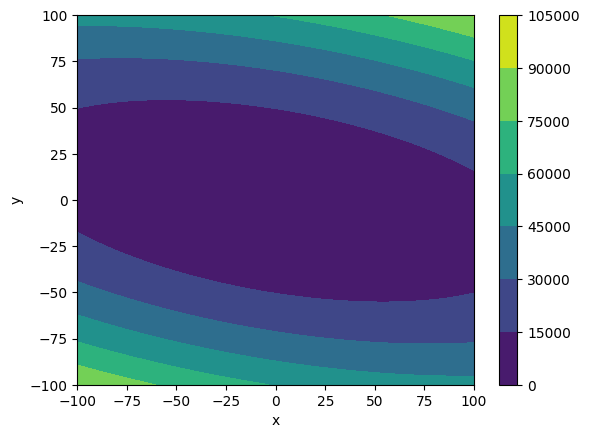

In [28]:
plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
draw_function_diff = sp.lambdify([x, y], function_diff)

In [30]:
X_extreme, Y_extreme = np.meshgrid(delta_x, delta_y)
Z_extreme = draw_function_diff(X_extreme,Y_extreme)

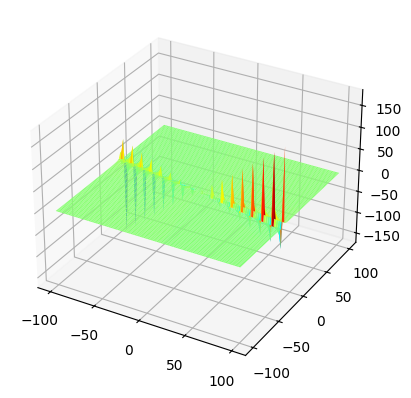

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_extreme, Y_extreme, Z_extreme, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')

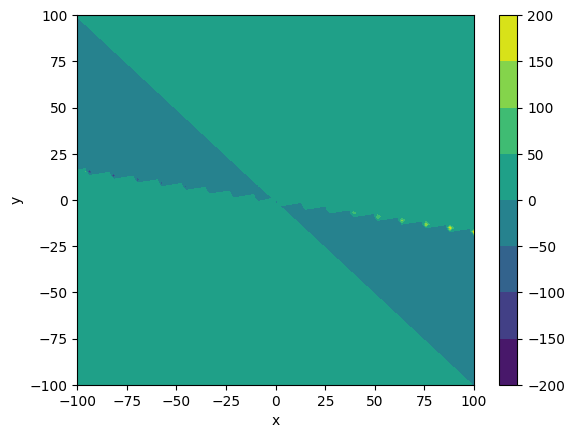

In [32]:
plt.contourf(X_extreme, Y_extreme, Z_extreme)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim([-1, 0])
# plt.ylim([-1,0])
plt.show()